<br>
<img src="header.jpg" alt="Drawing" style="width: 500px;"/>

# Image Classification - Deep Learning with Tensorflow
---

In [1]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Checking shapes

In [2]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


#### X_train: 50000 images, images size= 32x32px , 3=RGB
#### y_train: 1 column only

LABEL = [6]


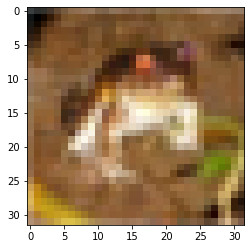

In [3]:
import matplotlib.pyplot as plt
label = 0
img = plt.imshow(X_train[label])
print(f"LABEL = {y_train[label]}")

<img src="labels.png" alt="Drawing" style="width: 300px;"/>

In [4]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [5]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train[6]

array([[[0.6431373 , 0.80784315, 0.32941177],
        [0.4117647 , 0.54901963, 0.23921569],
        [0.4627451 , 0.5803922 , 0.39607844],
        ...,
        [0.42745098, 0.5764706 , 0.28627452],
        [0.42352942, 0.5764706 , 0.27058825],
        [0.35686275, 0.5058824 , 0.22352941]],

       [[0.654902  , 0.8352941 , 0.32941177],
        [0.45490196, 0.627451  , 0.19215687],
        [0.28235295, 0.42745098, 0.16862746],
        ...,
        [0.4117647 , 0.5568628 , 0.30980393],
        [0.4117647 , 0.5568628 , 0.28235295],
        [0.34901962, 0.49803922, 0.22352941]],

       [[0.54901963, 0.7490196 , 0.25490198],
        [0.5568628 , 0.75686276, 0.25882354],
        [0.46666667, 0.6392157 , 0.30980393],
        ...,
        [0.40784314, 0.54509807, 0.32941177],
        [0.32941177, 0.47058824, 0.22745098],
        [0.30588236, 0.4509804 , 0.19215687]],

       ...,

       [[0.54509807, 0.5803922 , 0.31764707],
        [0.5568628 , 0.60784316, 0.2901961 ],
        [0.5294118 , 0

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [9]:
import keras
import tensorflow as tf

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [12]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, y_train_one_hot, 
           batch_size=64, epochs=400, 
           validation_split=0.2)

Epoch 1/400
625/625 [==============================] - 80s 128ms/step - loss: 2.1703 - accuracy: 0.3061 - val_loss: 1.4766 - val_accuracy: 0.4666
Epoch 2/400
625/625 [==============================] - 79s 127ms/step - loss: 1.5987 - accuracy: 0.4192 - val_loss: 1.3857 - val_accuracy: 0.5038
Epoch 3/400
625/625 [==============================] - 79s 127ms/step - loss: 1.4505 - accuracy: 0.4723 - val_loss: 1.3843 - val_accuracy: 0.4948
Epoch 4/400
625/625 [==============================] - 80s 127ms/step - loss: 1.3669 - accuracy: 0.5013 - val_loss: 1.2620 - val_accuracy: 0.5436
Epoch 5/400
625/625 [==============================] - 80s 127ms/step - loss: 1.3070 - accuracy: 0.5271 - val_loss: 1.2291 - val_accuracy: 0.5532
Epoch 6/400
625/625 [==============================] - 80s 127ms/step - loss: 1.2543 - accuracy: 0.5468 - val_loss: 1.2909 - val_accuracy: 0.5391
Epoch 7/400
625/625 [==============================] - 79s 127ms/step - loss: 1.2028 - accuracy: 0.5658 - val_loss: 1.1529 -

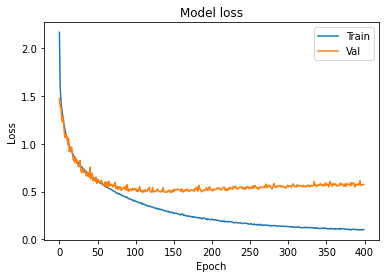

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [15]:
model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 17ms/step - loss: 0.5935 - accuracy: 0.8620


0.8619999885559082

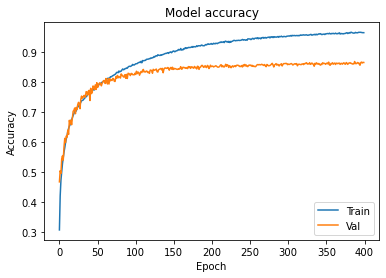

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [17]:
model.save('2nd_model.h5')

In [18]:
from keras.models import load_model
model = load_model('2nd_model.h5')

In [105]:
my_image = plt.imread("dog_cat.png")

In [106]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

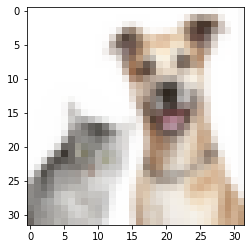

In [107]:
plt.imshow(my_image_resized)

In [108]:
import numpy as np
predicted_classes = model.predict(X_test)
#predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [109]:
predicted_classes

array([[2.7600368e-06, 6.0887169e-07, 2.1171605e-04, ..., 2.9267690e-07,
        1.0655547e-05, 5.7392096e-08],
       [7.1142371e-05, 3.8487233e-02, 1.8772297e-12, ..., 2.0638087e-14,
        9.6144164e-01, 6.3877450e-09],
       [9.5309844e-08, 1.7354856e-05, 7.8742284e-09, ..., 1.3995672e-09,
        9.9998212e-01, 3.7911079e-07],
       ...,
       [8.9215085e-12, 4.6667076e-10, 1.4817294e-07, ..., 5.1027851e-06,
        8.2361763e-11, 7.1705269e-10],
       [1.9346039e-07, 9.9999976e-01, 5.3441318e-10, ..., 2.9791668e-12,
        2.4331106e-09, 1.0640148e-08],
       [5.2228094e-10, 2.0908040e-09, 1.2129668e-09, ..., 9.9999869e-01,
        7.4404334e-13, 1.6879012e-11]], dtype=float32)

In [110]:
probabilities = model.predict(np.array( [my_image_resized,] ))

In [111]:
probabilities

array([[4.44206792e-13, 2.60043235e-13, 1.66354205e-11, 3.47877830e-07,
        2.19413376e-11, 9.99999642e-01, 1.17851015e-11, 5.08515940e-09,
        3.85957867e-13, 2.05052338e-12]], dtype=float32)

In [112]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.99999964
Second most likely class: cat -- Probability: 3.4787783e-07
Third most likely class: horse -- Probability: 5.0851594e-09
Fourth most likely class: deer -- Probability: 2.1941338e-11
Fifth most likely class: bird -- Probability: 1.663542e-11


In [71]:
num_classes = 10
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.76      0.88      0.81      1000
     Class 1       0.95      0.91      0.93      1000
     Class 2       0.88      0.74      0.81      1000
     Class 3       0.78      0.69      0.74      1000
     Class 4       0.84      0.87      0.85      1000
     Class 5       0.79      0.81      0.80      1000
     Class 6       0.88      0.92      0.90      1000
     Class 7       0.90      0.90      0.90      1000
     Class 8       0.91      0.93      0.92      1000
     Class 9       0.91      0.93      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

